In [1]:
import pandas as pd

In [2]:
retail= pd.read_csv('retail_clean.csv')

In [4]:
retail.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [5]:
retail['InvoiceDate']= pd.to_datetime(retail['InvoiceDate'])
retail['daysofweek']= retail['InvoiceDate'].dt.dayofweek

retail['daysofweek'].value_counts()

3    156012
1    134028
2    130782
6    130141
0    124957
4    103175
5       400
Name: daysofweek, dtype: int64

In [6]:
retail['date']= retail['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail['date']=pd.to_datetime(retail['date'])

**CV2**

In [8]:
retail_grouped = retail.groupby(['Description','date']).agg(total_sales=('Quantity','sum')).reset_index()

cv_data = retail_grouped.groupby('Description').agg(average=('total_sales','mean'),
                                                   sd=('total_sales','std')).reset_index()

cv_data['CV_2'] = (cv_data['sd']/cv_data['average'])**2
cv_data.head()

,Description,average,sd,CV_2
0,DOORMAT UNION JACK GUNS AND ROSES,6.958333,7.865606,1.277774
1,3 STRIPEY MICE FELTCRAFT,11.220339,14.247889,1.612460
2,4 PURPLE FLOCK DINNER CANDLES,7.363636,10.850123,2.171124
3,50'S CHRISTMAS GIFT BAG LARGE,31.416667,55.502112,3.121036
4,ANIMAL STICKERS,32.083333,11.758620,0.134324


**ADI**

In [10]:
product_by_date=retail.groupby(['Description','date']).agg(count=('Description','count')).reset_index()

items = product_by_date.Description.unique()
items


array(['  DOORMAT UNION JACK GUNS AND ROSES', ' 3 STRIPEY MICE FELTCRAFT',
       ' 4 PURPLE FLOCK DINNER CANDLES', ...,
       'ZINC WILLIE WINKIE  CANDLE STICK', 'ZINC WIRE KITCHEN ORGANISER',
       'ZINC WIRE SWEETHEART LETTER TRAY'], dtype=object)

In [11]:
empty_dataframe = pd.DataFrame()

for item in items:
    a= product_by_date[product_by_date.Description == item]
    a['previous_date'] = a['date'].shift(1)
    empty_dataframe = pd.concat([empty_dataframe,a],axis=0)

empty_dataframe.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Description,date,count,previous_date
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1,NaT
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,3,2010-01-05
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,1,2010-01-08
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,2,2010-01-10
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1,2010-01-11
...,...,...,...,...
440441,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,2,2011-10-27
440442,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,1,2011-11-18
440443,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1,2011-11-23
440444,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1,2011-11-24


In [12]:
empty_dataframe['Duration']= (empty_dataframe['date']-empty_dataframe['previous_date']).dt.days
empty_dataframe


,Description,date,count,previous_date,Duration
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1,NaT,NaN
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,3,2010-01-05,3.0
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,1,2010-01-08,2.0
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,2,2010-01-10,1.0
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1,2010-01-11,1.0
...,...,...,...,...,...
440441,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,2,2011-10-27,22.0
440442,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,1,2011-11-18,5.0
440443,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1,2011-11-23,1.0
440444,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1,2011-11-24,6.0


In [14]:
empty_dataframe['Duration']= pd.to_numeric(empty_dataframe['Duration'],errors='coerce')

In [15]:
ADI= empty_dataframe.groupby('Description').agg(ADI= ('Duration','mean')).reset_index()
ADI

,Description,ADI
0,DOORMAT UNION JACK GUNS AND ROSES,3.695652
1,3 STRIPEY MICE FELTCRAFT,3.741379
2,4 PURPLE FLOCK DINNER CANDLES,10.511628
3,50'S CHRISTMAS GIFT BAG LARGE,1.847458
4,ANIMAL STICKERS,8.272727
...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,1.736842
5279,ZINC TOP 2 DOOR WOODEN SHELF,17.550000
5280,ZINC WILLIE WINKIE CANDLE STICK,2.536082
5281,ZINC WIRE KITCHEN ORGANISER,24.333333


**Merge CV2 & ADI**

In [17]:
adi_cv = pd.merge(ADI, cv_data)
adi_cv

,Description,ADI,average,sd,CV_2
0,DOORMAT UNION JACK GUNS AND ROSES,3.695652,6.958333,7.865606,1.277774
1,3 STRIPEY MICE FELTCRAFT,3.741379,11.220339,14.247889,1.612460
2,4 PURPLE FLOCK DINNER CANDLES,10.511628,7.363636,10.850123,2.171124
3,50'S CHRISTMAS GIFT BAG LARGE,1.847458,31.416667,55.502112,3.121036
4,ANIMAL STICKERS,8.272727,32.083333,11.758620,0.134324
...,...,...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,1.736842,36.522388,46.825017,1.643757
5279,ZINC TOP 2 DOOR WOODEN SHELF,17.550000,5.902439,7.598700,1.657355
5280,ZINC WILLIE WINKIE CANDLE STICK,2.536082,21.116438,23.437864,1.231955
5281,ZINC WIRE KITCHEN ORGANISER,24.333333,2.500000,2.505549,1.004444


In [18]:
# remove products which has NaNs in CV2
adi_cv = adi_cv[adi_cv['CV_2'].notna()]
adi_cv

,Description,ADI,average,sd,CV_2
0,DOORMAT UNION JACK GUNS AND ROSES,3.695652,6.958333,7.865606,1.277774
1,3 STRIPEY MICE FELTCRAFT,3.741379,11.220339,14.247889,1.612460
2,4 PURPLE FLOCK DINNER CANDLES,10.511628,7.363636,10.850123,2.171124
3,50'S CHRISTMAS GIFT BAG LARGE,1.847458,31.416667,55.502112,3.121036
4,ANIMAL STICKERS,8.272727,32.083333,11.758620,0.134324
...,...,...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,1.736842,36.522388,46.825017,1.643757
5279,ZINC TOP 2 DOOR WOODEN SHELF,17.550000,5.902439,7.598700,1.657355
5280,ZINC WILLIE WINKIE CANDLE STICK,2.536082,21.116438,23.437864,1.231955
5281,ZINC WIRE KITCHEN ORGANISER,24.333333,2.500000,2.505549,1.004444


**Product Categorization**

In [19]:
def category(dataframe):
 
    if((dataframe['ADI']<= 1.34) & (dataframe['CV_2']<= 0.49)):
      a='smooth'
    if((dataframe['ADI']>= 1.34) & (dataframe['CV_2']>= 0.49)):
      a= 'Lumpy'
    if((dataframe['ADI']< 1.34) & (dataframe['CV_2']> 0.49)):
      a='Erratic'
    if((dataframe['ADI']> 1.34) & (dataframe['CV_2']< 0.49)):
      a='intermittent'
    return a

In [20]:
adi_cv['category']= adi_cv.apply(category, axis=1)
adi_cv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Description,ADI,average,sd,CV_2,category
0,DOORMAT UNION JACK GUNS AND ROSES,3.695652,6.958333,7.865606,1.277774,Lumpy
1,3 STRIPEY MICE FELTCRAFT,3.741379,11.220339,14.247889,1.612460,Lumpy
2,4 PURPLE FLOCK DINNER CANDLES,10.511628,7.363636,10.850123,2.171124,Lumpy
3,50'S CHRISTMAS GIFT BAG LARGE,1.847458,31.416667,55.502112,3.121036,Lumpy
4,ANIMAL STICKERS,8.272727,32.083333,11.758620,0.134324,intermittent
...,...,...,...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,1.736842,36.522388,46.825017,1.643757,Lumpy
5279,ZINC TOP 2 DOOR WOODEN SHELF,17.550000,5.902439,7.598700,1.657355,Lumpy
5280,ZINC WILLIE WINKIE CANDLE STICK,2.536082,21.116438,23.437864,1.231955,Lumpy
5281,ZINC WIRE KITCHEN ORGANISER,24.333333,2.500000,2.505549,1.004444,Lumpy


**Segementation Plot**

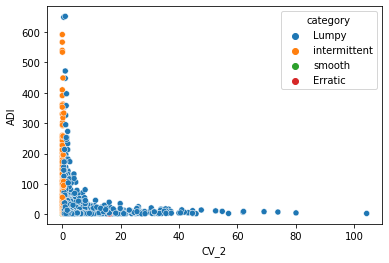

In [21]:
import seaborn as sns

sns.scatterplot(x='CV_2',y='ADI',hue='category',data=adi_cv)


In [22]:
adi_cv.category.value_counts()

Lumpy           4246
intermittent     726
Erratic           91
smooth            10
Name: category, dtype: int64